In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('energy_data.csv')
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

## 1. How many different companies are represented in the data set?
To answer this I will count unique entries in the company name column

In [3]:
print(len(data['Company Name'].unique()))

439


## 2. What is the total number of jobs created for businesses in Queens?


In [4]:
#select only data for Queens, check if looks correct
data_queens = data.query('Borough == "Queens"')
data_queens.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
6,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,Limousine Service,...,129401.39,Queens,40.745706,-73.929565,402.0,26.0,179.0,4003160.0,4.002220e+09,Hunters Point-Sunnyside-West Maspeth
8,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,Electrical Parts Mfg.,...,28752.48,Queens,40.785144,-73.844833,407.0,19.0,929.0,4098344.0,4.040850e+09,College Point
12,"21st Century Optics, Inc.",Ralph Woythaler,rwoythaler@21st centuryoptics.com,7183922310,47-00 33rd Street,Lond Island City,NY,11101,Manufacturing,Eye glasses,...,288983.01,Queens,40.742386,-73.932148,402.0,26.0,199.0,4003447.0,4.002520e+09,Hunters Point-Sunnyside-West Maspeth
14,4Over4.com,Anastasio Panagiotopolous,taso@4over4.com,7189322700,19-41 46th Street,Long Island City,NY,11105,Manufacturing,Printer,...,184923.14,Queens,40.774940,-73.896804,401.0,22.0,12301.0,4441806.0,4.007740e+09,Steinway
15,538-540 West 35 Corp,Richard Silver,tankman220@aol.com,2127366618,11-42 46th Road,Queens,NY,11101,Manufacturing,"steel, wood & cement tanks",...,56744.11,Queens,40.745510,-73.949497,402.0,26.0,7.0,4436616.0,4.000560e+09,Hunters Point-Sunnyside-West Maspeth


In [5]:
#find the sum of all jobs created (if any)
print(data_queens['Job created'].sum())

102.0


## 3. How many different unique email domains names are there in the data set?
Split whatever is after @ into a separate column

In [6]:
#create a function that will separate out domain name
def splitter(row):
    email = row['company email']
    if pd.isna(email) or ('@' not in email): #to exclude errors from missing values or improper email format
        return float("nan")
    else:     
        email = email.split('@')
        return email[1]

data['email_domain'] = data.apply(splitter, axis=1)
#data.head()
    

In [7]:
#count unique values in the new email_domain columns
print(len(data['email_domain'].unique()))

357


## 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? 
FOr this I will group the dataset by NTA and apply corresponding aggfunctions to find values of interest, then filter out the NTA data with less than 5 businesses.

In [8]:
data_agg = data.groupby('NTA').agg({'Company Name':['count'],
                                   'Total Savings':['mean'],
                                   'Job created':['sum']})
data_agg.columns = ['company_count', 'average_savings', 'jobs_created']
data_agg = data_agg[data_agg['company_count'] >= 5]
display(data_agg)

,company_count,average_savings,jobs_created
NTA,,,
Battery Park City-Lower Manhattan,9,469890.796667,0.0
Bushwick South,10,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,11,24337.390000,0.0
College Point,7,17159.372857,2.0
Crown Heights North,9,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,10,59950.340000,0.0
East New York,9,48433.093333,15.0
East Williamsburg,11,13990.626364,0.0
Greenpoint,14,9753.649286,0.0


## 5. Save your result for the previous question as a CSV file.

In [9]:
data_agg.to_csv('day4_results.csv')

# Day 5  : Matplotlib/Seaborn

- scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
- histogram of the log of the average total savings.
- line plot of the total jobs created for each month.


In [10]:
import seaborn as sns

<AxesSubplot:xlabel='average_savings', ylabel='jobs_created'>

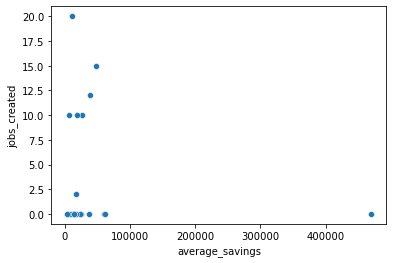

In [11]:
sns.scatterplot(data=data_agg, x='average_savings', y='jobs_created')

<AxesSubplot:xlabel='average_savings', ylabel='Count'>

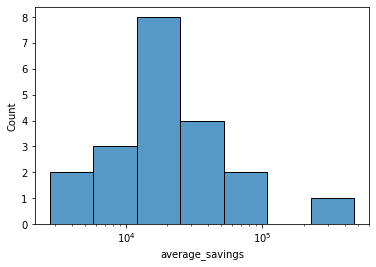

In [12]:
sns.histplot(data=data_agg, x='average_savings', log_scale=True)

In [13]:
#i did not understand how to do the last task in this assignment, because in most of the jobs created column
#there is no data in the source file